## Project: Visualizing Real World Data - Data jobs Salaries

![img](../survey_img.png)

### Overview


The goal of this project was to practice creating and interpreting different types of visualizations using real world data.

I have chosen to study a dataset of around 19,000 women's shoes and their associated product information. The dataset is the public extract of one of the databases sold by Datafiniti, a database provider for business. The public extract was downloaded from Kaggle.

Each line of the dataset is a respondent to the survey. The features are country, job position, salary, job satisfaction and more.

The dataset used was uploaded at https://www.kaggle.com/phuchuynguyen/salary-and-moredata-scientist-analyst-engineer
It is in a .csv format
The survey questionnaire is included in the repo.  https://developer.datafiniti.co/docs/product-data-schema

## Libraries
Pandas and numpy will be needed for the analysis of the data.
Seaborn will be needed for vizualisations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Let's import and assign it to a variable named `initial_survey_results`.
sal = pd.read_csv('../data/initial_survey_results.csv')

# 1. Preparing the data.
Let's see how the data looks by using pandas methods like 'shape', `head()`, `info()` and `dtypes`.

In [3]:
# Let's find out the total number of rows and columns in the dataset using the “.shape” method.
sal.shape
print(f'This dataset has {sal.shape[0]} observations and {sal.shape[1]} features.')

This dataset has 33601 observations and 14 features.


In [4]:
# Let's print 5 random rows of our dataset for a first look at the features and at some of the values.
sal.sample(5) 

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
16656,2019,Yes,100000.0,United States,Bachelor's degree,Employed full-time,4.0,"10,000 or more employees",Mathematics or statistics,2.0,1,1,1.0,0.0
32421,2020,Yes,37816.0,Canada,Some college/university study without earning ...,Employed full-time,8.0,NaN,Computer science,2.0,0,1,0.0,0.0
12130,2018,No,5424.0,Pakistan,Bachelor's degree,"Independent contractor, freelancer, or self-em...",9.0,NaN,Another engineering discipline,8.0,0,0,1.0,NaN
15758,2019,No,172000.0,United States,Bachelor's degree,Employed full-time,8.0,"1,000 to 4,999 employees",Social science,7.0,1,0,1.0,0.0
25766,2020,Yes,65000.0,United States,Master's degree,Employed full-time,6.0,"10,000 or more employees",Information systems,3.0,0,1,1.0,1.0


**Comments:**

We can see from this row sample that:
- there seems to be a significant number of missing data in the last 2 columns.
- The column names are not self-explanatory.
- The order of the columns is not logical.

**Selecting features**

We will not need all columns in this project. Let's drop those that are the least interesting for our analysis.

In [5]:
sal.drop(['Hobbyist', 'UndergradMajor','YearsCodePro'], axis=1, inplace=True, errors='ignore')
#check 
print(sal.shape)
sal.sample()

(33601, 11)


,Year,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
30521,2020,23352.0,Germany,Professional degree,"Independent contractor, freelancer, or self-em...",4.0,2 to 9 employees,0,1,0.0,0.0


**Renaming and Reordering Columns**

Current column names are not always self-explanatory. Let's rename the columns to make it easier to understand what the data is about.

In [6]:
sal.columns = ['Year', 'Salary (USD, Annual)', 'Country', 'Education Level', 'Employment Status',
       'Job Satisfaction', 'Org Size', 'Data Scientist or Machine Learning Specialist',
       'Database Administrator', 'Data/Business Analyst', 'Data Engineer']
sal = sal[['Year', 'Country', 'Data Scientist or Machine Learning Specialist', 'Database Administrator', 'Data/Business Analyst', 'Data Engineer','Education Level',
     'Employment Status','Org Size', 'Salary (USD, Annual)', 'Job Satisfaction']]
#check 
sal.sample()

,Year,Country,Data Scientist or Machine Learning Specialist,Database Administrator,Data/Business Analyst,Data Engineer,Education Level,Employment Status,Org Size,"Salary (USD, Annual)",Job Satisfaction
13948,2019,Canada,0,1,0.0,0.0,Bachelor's degree,Employed full-time,2 to 9 employees,28650.0,2.0


**Data Types**

In [7]:
sal.dtypes

Year                                               int64
Country                                           object
Data Scientist or Machine Learning Specialist      int64
Database Administrator                             int64
Data/Business Analyst                            float64
Data Engineer                                    float64
Education Level                                   object
Employment Status                                 object
Org Size                                          object
Salary (USD, Annual)                             float64
Job Satisfaction                                 float64
dtype: object

**Comments:**

We can see that our data is both categorical (Country, education level, employment status and organization size), and numeric (salary, year, and job satisfaction).

Actually the data type for Job Satisfaction is ordinal (measured from 1 to 10 instead from "not satisfied" to "extremely satisfied"), meaning that it can be considered both categorical and numeric.

The data type for the job position columns is not harmonized: "Data Scientist" and "DB Administrators" have integer values, while "Data Analyst" and "Data Engineer" have float values.

**Comments:**
Let's start by harmonizing the data types for the 4 job position columns.

In [8]:
sal.loc[:,['Data Scientist or Machine Learning Specialist','Database Administrator','Data Engineer','Data/Business Analyst']] = sal.loc[:,['Data Scientist or Machine Learning Specialist','Database Administrator','Data Engineer','Data/Business Analyst']].astype(str)

**Comments:**
Let's also change the data type for Salary from float to integer. We don't need that kind of detailing!

In [9]:
sal['Salary (USD, Annual)'] = sal['Salary (USD, Annual)'].astype('int')
#check
sal.dtypes

Year                                               int64
Country                                           object
Data Scientist or Machine Learning Specialist     object
Database Administrator                            object
Data/Business Analyst                             object
Data Engineer                                     object
Education Level                                   object
Employment Status                                 object
Org Size                                          object
Salary (USD, Annual)                               int32
Job Satisfaction                                 float64
dtype: object

**Comments:**

Now let's convert the data type for 'Org Size' from string to integer. This way we may study the potential correlations between organization size and other features.

To convert the data type we need to get rid of missing values first. Let's assume that when an individual did not answer that's because he did not know the answer.

In [10]:
sal['Org Size'].value_counts()

20 to 99 employees                                    6861
100 to 499 employees                                  5332
10,000 or more employees                              4360
2 to 9 employees                                      4087
10 to 19 employees                                    3538
1,000 to 4,999 employees                              3331
500 to 999 employees                                  1889
5,000 to 9,999 employees                              1408
Just me - I am a freelancer, sole proprietor, etc.    1063
I don't know                                            26
I prefer not to answer                                   9
Name: Org Size, dtype: int64

In [11]:
sal['Org Size'].fillna("I don't know", inplace=True)

In [12]:
sal.loc[sal['Org Size']=='I prefer not to answer', 'Organization Size'] = '0'
sal.loc[sal['Org Size']=="I don't know", 'Organization Size'] = '0'
sal.loc[sal['Org Size']== '0', 'Organization Size'] = '0'
sal.loc[sal['Org Size']=='Just me - I am a freelancer, sole proprietor, etc.', 'Organization Size'] ='1'
sal.loc[sal['Org Size']=='2 to 9 employees', 'Organization Size'] ='9'
sal.loc[sal['Org Size']=='10 to 19 employees', 'Organization Size'] ='19'
sal.loc[sal['Org Size']=='20 to 99 employees', 'Organization Size'] ='99'
sal.loc[sal['Org Size']=='100 to 499 employees', 'Organization Size'] ='499'
sal.loc[sal['Org Size']=='500 to 999 employees', 'Organization Size'] ='999'
sal.loc[sal['Org Size']=='1,000 to 4,999 employees', 'Organization Size'] ='4999'
sal.loc[sal['Org Size']=='5,000 to 9,999 employees', 'Organization Size'] ='9999'
sal.loc[sal['Org Size']=='10,000 or more employees', 'Organization Size'] ='10000'

sal = sal[sal['Organization Size']!='0']
sal = sal[['Year', 'Country', 'Data Scientist or Machine Learning Specialist',
       'Database Administrator', 'Data/Business Analyst', 'Data Engineer',
       'Education Level', 'Employment Status', 'Organization Size',
       'Salary (USD, Annual)', 'Job Satisfaction']]
sal['Organization Size'] = sal['Organization Size'].astype('int')

# check
print(sal.dtypes)
print(sal.shape)

Year                                               int64
Country                                           object
Data Scientist or Machine Learning Specialist     object
Database Administrator                            object
Data/Business Analyst                             object
Data Engineer                                     object
Education Level                                   object
Employment Status                                 object
Organization Size                                  int32
Salary (USD, Annual)                               int32
Job Satisfaction                                 float64
dtype: object
(31869, 11)


**Streamlining data in cells**
Let's have a look at the distinct values in each column, starting with Salary.

In [13]:
print(f'We initially have {sal.Country.nunique()} distinct countries in our dataset. Let us print it and examine it.')
sal.sort_values(by='Country')['Country'].unique()

We initially have 177 distinct countries in our dataset. Let us print it and examine it.


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo, Republic of the...',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "CÃ´te d'Ivoire", 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hong Kong (S.A.R.)', 'Hungary', 'I prefer not to say', 'Iceland',
       'India', 'Indonesia', 

In [14]:
print(f'By printing the list of distinct values we can see that some are duplicates under a different name, like "Hong Kong" and "Hong Kong (S.A.R.)".')
print()

Countrydict = {"Bosnia and Herzegovina":"Bosnia-Herzegovina",
               "Syrian Arab Republic":"Syria",
               "Republic of Moldova":"Moldavia",
               "Libyan Arab Jamahiriya":"Libya",
               "Hong Kong (S.A.R.)":"Hong Kong",
               "Viet Nam":"Vietnam",
               "United Republic of Tanzania":"Tanzania",
               "Republic of Korea":"South Korea",
                  "Slovakia":"Slovak Republic",
                  "The former Yugoslav Republic of Macedonia":"Macedonia",
                  "Iran, Islamic Republic of...":"Iran",
                    "CÃ´te d'Ivoire":"Cote d'Ivoire",
                  "C√¥te d'Ivoire":"Cote d'Ivoire",
                  "Venezuela, Bolivarian Republic of...":"Venezuela",
                  "Congo, Republic of the...":"Republic of the Congo",
                   "Democratic Republic of the Congo":"Democratic Republic of Congo"}

sal.replace({'Country':Countrydict}, inplace=True)  

#check

print(f"After streamlining our new list of countries is now as follows:  {sal.sort_values(by='Country')['Country'].unique()}.")
print()
print(f'Which means we have streamlined our "Country" column to {sal.Country.nunique()} distinct values.')

By printing the list of distinct values we can see that some are duplicates under a different name, like "Hong Kong" and "Hong Kong (S.A.R.)".

After streamlining our new list of countries is now as follows:  ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia-Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China'
 'Colombia' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Fiji' 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hong Kong' 'Hungary'
 'I prefer not to say' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Isle of

**Comments:**
We know that the survey data covers 4 editions of the survey (2017,2018,2019 and 2020).
To be able to study potential changes from one year to the other, let's decide to drop the countries that have NOT participated in all 4 editions.
And let's also drop those countries with less than 30 respondents each year, as those would not be representative of anything but themselves. 

In [15]:
yearrep = sal.pivot_table(index=['Country'], columns = ['Year'], aggfunc = {'Year':'count'})
pd.DataFrame(yearrep)
yearrep = yearrep.dropna()
print(yearrep)

                Year                        
Year            2017    2018    2019    2020
Country                                     
Albania          2.0    11.0    14.0     4.0
Argentina       11.0    47.0    82.0    48.0
Armenia          2.0     7.0    11.0     3.0
Australia       56.0   261.0   299.0   200.0
Austria         26.0    89.0   122.0    69.0
...              ...     ...     ...     ...
United States  749.0  2797.0  3312.0  1872.0
Uruguay          1.0    11.0    23.0    17.0
Venezuela        6.0     8.0    13.0    12.0
Vietnam          2.0    13.0    18.0    23.0
Zimbabwe         1.0     5.0     3.0     6.0

[88 rows x 4 columns]


In [16]:
yearrep_f = yearrep[yearrep.iloc[:,[0,1,2,3]]>=30]
yearrep_f = yearrep_f.dropna()
yearrep_f

Year                        
Year                 2017    2018    2019    2020
Country                                          
Australia            56.0   261.0   299.0   200.0
Brazil               49.0   240.0   289.0   260.0
Canada              149.0   399.0   458.0   277.0
France               83.0   238.0   313.0   220.0
Germany             215.0   706.0   834.0   528.0
India               117.0   588.0   772.0   539.0
Italy                40.0   141.0   233.0   149.0
Netherlands          43.0   181.0   291.0   183.0
Poland               43.0   123.0   245.0   141.0
Russian Federation   30.0   208.0   236.0   141.0
Spain                50.0   185.0   251.0   183.0
Sweden               39.0   137.0   204.0   124.0
Switzerland          33.0   123.0   186.0   104.0
United Kingdom      266.0   744.0   761.0   476.0
United States       749.0  2797.0  3312.0  1872.0

In [17]:
countries_tokeep = set(list(yearrep_f.index))
sal = sal[sal.Country.isin(countries_tokeep)]
print(f'We are finally down to a list of {sal.Country.nunique()} countries, in a dataset of {sal.shape[0]} rows and {sal.shape[1]} columns.')

We are finally down to a list of 15 countries, in a dataset of 23114 rows and 11 columns.


Now let's look at the values in the job columns.

In [18]:
print(sal['Database Administrator'].unique())
print(sal['Data Scientist or Machine Learning Specialist'].unique())
print(sal['Data/Business Analyst'].unique())
print(sal['Data Engineer'].unique())

['1' '0']
['1' '0']
['nan' '0.0' '1.0']
['nan' '0.0' '1.0']


We will assume that when an individual did not provide any answer, that's because he/she meant 'No'.
Let's streamline the data to have a binary 'yes or no' answer.

In [19]:
jobdict = {"1":"Yes", "1.0":"Yes", "0":"No", "0.0":"No", "nan":"No"}
sal.replace({'Database Administrator':jobdict,'Data Scientist or Machine Learning Specialist':jobdict,'Data/Business Analyst':jobdict,'Data Engineer':jobdict}, inplace=True)  

#check
print(sal['Database Administrator'].unique())
print(sal['Data Scientist or Machine Learning Specialist'].unique())
print(sal['Data/Business Analyst'].unique())
print(sal['Data Engineer'].unique())

['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


Let' create a new data feature with the position held, and hide the old features.

In [20]:
sal.columns

Index(['Year', 'Country', 'Data Scientist or Machine Learning Specialist',
       'Database Administrator', 'Data/Business Analyst', 'Data Engineer',
       'Education Level', 'Employment Status', 'Organization Size',
       'Salary (USD, Annual)', 'Job Satisfaction'],
      dtype='object')

In [21]:
sal.loc[sal['Data Scientist or Machine Learning Specialist']=='Yes', 'Job Position'] ='Data Scientist | ML Specialist'
sal.loc[sal['Database Administrator']=='Yes', 'Job Position'] ='Database Administrator'
sal.loc[sal['Data Engineer']=='Yes', 'Job Position'] ='Data Engineer'
sal.loc[sal['Data/Business Analyst']=='Yes', 'Job Position'] ='Data / Business Analyst'
sal = sal[['Year', 'Country', 'Job Position','Education Level', 'Employment Status','Salary (USD, Annual)', 'Job Satisfaction', 
       'Organization Size']]
sal.sample()

,Year,Country,Job Position,Education Level,Employment Status,"Salary (USD, Annual)",Job Satisfaction,Organization Size
23058,2019,Poland,Data / Business Analyst,Master's degree,Employed full-time,29184,6.0,10000


As for the other columns the data is in line with the survey questionnaire. No change is deemed necessary.

In [22]:
print(sal['Education Level'].unique())
print(sal['Employment Status'].unique())
print(sal.sort_values(['Job Satisfaction'])['Job Satisfaction'].unique())

["Bachelor's degree"
 "Some college/university study without earning a bachelor's degree"
 "Master's degree" 'Secondary school' 'Doctoral degree'
 'Professional degree' 'I prefer not to answer'
 'Primary/elementary school' 'I never completed any formal education'
 'Associate degree' nan]
['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed']
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]


**Missing Data**

Finally let's check the missing data.

In [23]:
sal.isna().sum()*100/len(sal)

Year                    0.000000
Country                 0.000000
Job Position            0.000000
Education Level         1.341179
Employment Status       0.000000
Salary (USD, Annual)    0.000000
Job Satisfaction        0.086528
Organization Size       0.000000
dtype: float64

As to the other missing values, they all represent a very small percentage of our dataset, so we'll decide to drop the lines.

In [24]:
sal.dropna(inplace=True)
# check
sal.isna().sum()

Year                    0
Country                 0
Job Position            0
Education Level         0
Employment Status       0
Salary (USD, Annual)    0
Job Satisfaction        0
Organization Size       0
dtype: int64

**Redundant Data**
Now let's see if some rows are duplicated.

In [25]:
print("Number of Duplicated Rows:", sal.duplicated().sum())
print(f'Percentage of duplicated rows: {sal.duplicated().sum()*100/len(sal)}%')

Number of Duplicated Rows: 844
Percentage of duplicated rows: 3.704191353960939%


We do have duplicated rows. However, they are a very small proportion of the total observations. And given the type of information collected, it could very well be that distinct individuals gave the same answers to all the survey questions. Hence we'll keep the duplicated rows. 

In [26]:
#Finally, let's reset the index of our dataset.
sal.reset_index(inplace=True, drop=True)
sal.head(3)

,Year,Country,Job Position,Education Level,Employment Status,"Salary (USD, Annual)",Job Satisfaction,Organization Size
0,2017,United Kingdom,Database Administrator,Bachelor's degree,Employed full-time,43750,4.0,9
1,2017,United States,Database Administrator,Some college/university study without earning ...,Employed full-time,100000,5.0,99
2,2017,United States,Database Administrator,Bachelor's degree,Employed full-time,120000,10.0,99


# 2. A first look at the basic statistics (continued on Tableau Public)


In [27]:
print(f'At this stage our dataset has {sal.shape[0]} observations and {sal.shape[1]} features.')

At this stage our dataset has 22785 observations and 8 features.


In [28]:
sal.describe()

,Year,"Salary (USD, Annual)",Job Satisfaction,Organization Size
count,22785.000000,22785.000000,22785.000000,22785.000000
mean,2018.755760,72160.279658,6.186921,2794.435989
std,0.907014,49525.001439,1.920502,3974.913256
min,2017.000000,0.000000,0.000000,1.000000
25%,2018.000000,36324.000000,5.000000,99.000000
50%,2019.000000,63642.000000,6.000000,499.000000
75%,2019.000000,99240.000000,8.000000,4999.000000
max,2020.000000,299436.000000,10.000000,10000.000000


In [29]:
print("The first interesting thing to mention is that the minimum salary is zero, which is hard to believe. Assuming that the O answer is a mistake, we'll need to drop the lines under a certain value.")
print(f"If we set that value at 1200 USD, we will only be dropping {len(sal[sal['Salary (USD, Annual)']<=1200])/len(sal)} of our data.")
print("Considering that this is not significant, we will proceed deleting the rows under 1200 USD salary.")


The first interesting thing to mention is that the minimum salary is zero, which is hard to believe. Assuming that the O answer is a mistake, we'll need to drop the lines under a certain value.
If we set that value at 1200 USD, we will only be dropping 0.005968839148562651 of our data.
Considering that this is not significant, we will proceed deleting the rows under 1200 USD salary.


**Final, clean dataset**

In [30]:
sal = sal[sal['Salary (USD, Annual)']>=1000]
sal.shape
print(f'Our final dataset has {sal.shape[0]} observations and {sal.shape[1]} features.')

Our final dataset has 22660 observations and 8 features.


We'll save our clean data into a new csv named 'clean_survey_results.csv'.

In [31]:
sal.to_csv('../data/clean_survey_results.csv')

In [32]:
# Let's go back to our basic statistics.
sal.describe()

,Year,"Salary (USD, Annual)",Job Satisfaction,Organization Size
count,22660.000000,22660.000000,22660.000000,22660.000000
mean,2018.756973,72556.592586,6.187555,2797.883583
std,0.906178,49372.310405,1.919572,3975.751969
min,2017.000000,1005.000000,0.000000,1.000000
25%,2018.000000,36716.000000,5.000000,99.000000
50%,2019.000000,64000.000000,6.000000,499.000000
75%,2019.000000,100000.000000,8.000000,4999.000000
max,2020.000000,299436.000000,10.000000,10000.000000


In [33]:
print(f"First we can see that mean and median are not aligned when Salary is concerned. The mean ({sal['Salary (USD, Annual)'].mean()} USD) is much higher than the median ({sal['Salary (USD, Annual)'].median()} USD) , which means that we probably have some ouliers at the high end.")


First we can see that mean and median are not aligned when Salary is concerned. The mean (72556.59258605473 USD) is much higher than the median (64000.0 USD) , which means that we probably have some ouliers at the high end.


**Boxplots & Histograms**

Let's create boxplots and histograms to check on the distribution and outliers in particular.

##### Salary

<AxesSubplot:xlabel='Salary (USD, Annual)'>

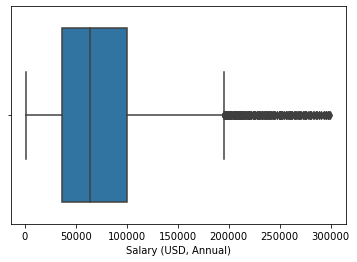

In [34]:
sns.boxplot(data = sal, x = sal['Salary (USD, Annual)'])

In [35]:
# Number of outliers by column:
outliers_amount = len(sal)*0.1
print(f"We can see that we have a lot of extreme values / outliers as defined by the dots above the right skewer. If we define the outliers as the top 10%, they are the salaries above {sal['Salary (USD, Annual)'].quantile(0.90).round(1)}.")
print(f"The max salary is USD {sal['Salary (USD, Annual)'].max()}, hence about {(sal['Salary (USD, Annual)'].max()/sal['Salary (USD, Annual)'].quantile(0.90)).round(1)} times higher than the 90% percentile.")
print(f"It is tempting to delete the outliers, however let's keep in mind that 1/ It is usual to have outliers in salary datasets. 2/ Our dataset covers {sal.Country.nunique()} countries. So this global boxplot covers data from high-wage countries like the USA and lower-wage countries like Poland. It is normal to have outliers and we would be better off keeping those at this stage. Let's not delete any info before we study the info by country.")

We can see that we have a lot of extreme values / outliers as defined by the dots above the right skewer. If we define the outliers as the top 10%, they are the salaries above 140000.0.
The max salary is USD 299436, hence about 2.1 times higher than the 90% percentile.
It is tempting to delete the outliers, however let's keep in mind that 1/ It is usual to have outliers in salary datasets. 2/ Our dataset covers 15 countries. So this global boxplot covers data from high-wage countries like the USA and lower-wage countries like Poland. It is normal to have outliers and we would be better off keeping those at this stage. Let's not delete any info before we study the info by country.


<AxesSubplot:xlabel='Salary (USD, Annual)', ylabel='Count'>

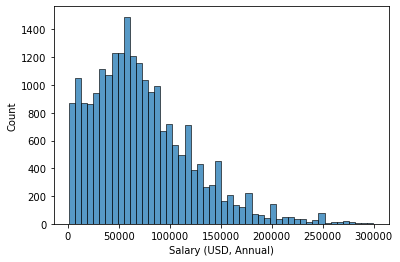

In [36]:
sns.histplot(data = sal, x = sal['Salary (USD, Annual)'], bins = 50)

**Comments:**

distribution biaisée sur la droite (long tail)

##### Job Satisfaction

<AxesSubplot:xlabel='Job Satisfaction'>

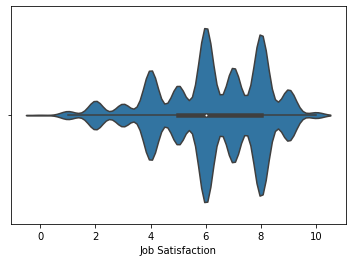

In [37]:
sns.violinplot(data = sal, x = sal['Job Satisfaction'])

<AxesSubplot:xlabel='Job Satisfaction', ylabel='Count'>

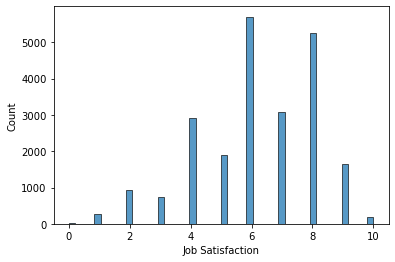

In [38]:
sns.histplot(data = sal, x = sal['Job Satisfaction'])

****Comments:****

distribution biaisée sur la gauche

**Scatter Matrix**

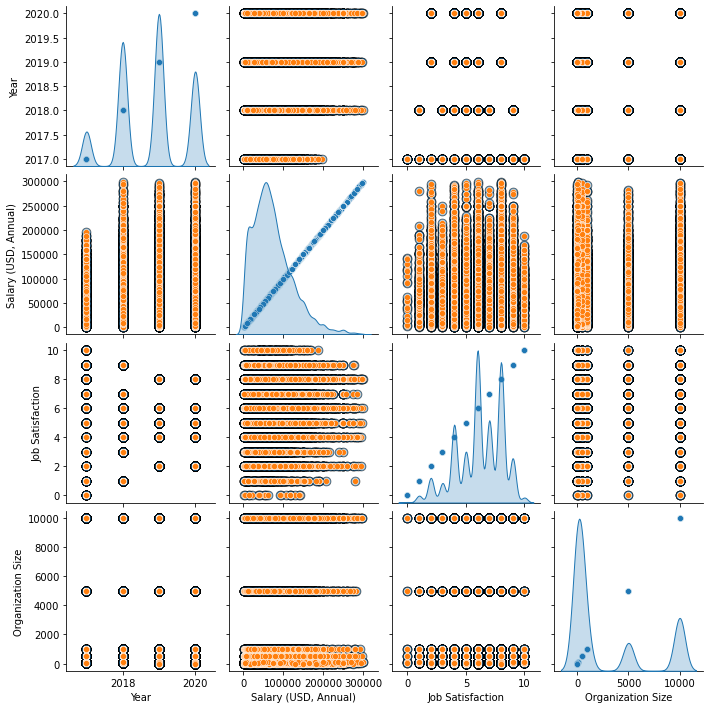

In [39]:
g = sns.pairplot(sal, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
g.map(sns.scatterplot)

# 3. Probability Analysis


Let's see if we can assume that our salary data can be generalized to the whole population of data professionals. Let's study this just in the USA where we have the most data.

First let's calculate confidence intervals for the mean salary of the general population of US data professionals.
We'll use Student's law to calculate the standard deviation of the bell-shaped curve.

In [40]:
import math
import scipy.stats

# Variables
US_sample = sal[sal['Country'] == 'United States']['Salary (USD, Annual)']
alpha = 0.95
df = len(US_sample) - 1
loc = np.mean(US_sample)
scale = np.std(US_sample)/np.sqrt(df)
sample_quasi_std = np.std(US_sample) * math.sqrt((len(US_sample) / df))
tstudent_std = sample_quasi_std / math.sqrt(len(US_sample));

# Confidence interval
interval = scipy.stats.t.interval(alpha, df, loc, scale=tstudent_std)

In [41]:
print(f"We have calculated that the confidence interval for the general population mean salary in the general population is {interval}. Which means that the actual mean is {(interval[1] - US_sample.mean()).round(0)} above or below our sample mean.")

We have calculated that the confidence interval for the general population mean salary in the general population is (104454.72713348301, 106436.22645985108). Which means that the actual mean is 991.0 above or below our sample mean.


In [42]:
sigma = np.std(US_sample)
print(sigma)
sigma_gen = sigma/np.sqrt(US_sample.count()-1)
print(sigma_gen)

46979.876394399456
505.42299689553346


In [43]:
print(f"****Comments:**** We can be 95% confident that our sample mean is close to the mean of the general population. By 'close' we mean in the range of 2 standard deviations around the mean of the general population. That's a range of USD {2*sigma_gen.round(0)} above or below the mean.")
print('This is not really surprising because our sample is quite large. The larger the sample, the closer its mean to the mean of the general population.')

****Comments:**** We can be 95% confident that our sample mean is close to the mean of the general population. By 'close' we mean in the range of 2 standard deviations around the mean of the general population. That's a range of USD 1010.0 above or below the mean.
This is not really surprising because our sample is quite large. The larger the sample, the closer its mean to the mean of the general population.


Now let's assume that the average salary for data professionals in the US over 2017-2020 is USD 105,000 and test if this hypothesis is worth rejecting, using the p-value method in Python.

In [44]:
# This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the given population mean.
# Ho: the mean annual salary for the whole population is equal to $105,000.
# Ha: the mean annual salary for the whole population is different from $105,000.

from scipy.stats import ttest_1samp
alpha = 0.05;
US_sample = sal[sal['Country'] == 'United States']['Salary (USD, Annual)']

st, p = ttest_1samp(US_sample, 105000)
print('p-value: ', p)
print("Null hypothesis rejected") if p < alpha else print("We cannot reject our hypothesis about the mean annual salary.")


p-value:  0.37812912232337725
We cannot reject our hypothesis about the mean annual salary.


It is not unreasonable to suppose that the general mean salary is 105,000.

(Analysis of the dataset to be continued on Tableau Public)